In [2]:
!pip install sastrawi gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you

# Import Library

In [81]:
# Import Library untuk Operasi Dasar
import pandas as pd
import numpy as np
import tensorflow as tf

# Import Library untuk Pemrosesan Teks dan Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

# Import Library untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library untuk Model dan Evaluasi
from sklearn.model_selection import train_test_split  # Split Data
from imblearn.over_sampling import SMOTE  # Handling Imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Performance Metrics

# Pengaturan Warning agar tidak muncul
import warnings
warnings.filterwarnings('ignore')

# Matplotlib Inline (untuk Jupyter)
%matplotlib inline


In [26]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
Embedding = layers.Embedding
LSTM = layers.LSTM
Bidirectional = layers.Bidirectional
Sequential = models.Sequential
Dense = layers.Dense
Dropout = layers.Dropout

# Load Data

In [21]:
df = pd.read_csv('app_reviews.csv')
df.head()

,Review
0,semakin kesini kok makin banyak fitur yang pro...
1,tolongg bangettt apknya di perbaiki jadi lebih...
2,Plis nyesel bngt di update. Setelah di update ...
3,Saya memiliki pengalaman mengedit video menggu...
4,Kenapa hampir semua di jadikan pro begitu samp...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [29]:
from collections import Counter
import re
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords # Import stopwords here
import nltk # Import nltk to use the download function

# Membaca dataset
df = pd.read_csv('app_reviews.csv')

# Menampilkan 5 baris pertama untuk memastikan struktur dataset
print(df.head())

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Menggabungkan semua isi kolom Review menjadi satu teks
# Corrected column name from 'review' to 'Review'
all_reviews = ' '.join(df['Review'].dropna().astype(str)).lower()  # Menggabungkan teks dan mengubahnya menjadi lowercase

# Tokenisasi kata
word_list = word_tokenize(all_reviews)

# Menghitung frekuensi kata
word_counts = Counter(word_list)

# Menampilkan 50 kata yang paling sering muncul
most_common_words = word_counts.most_common(50)
print(most_common_words)

# Menghapus kata-kata umum (stopwords) untuk mendapatkan kata-kata yang lebih relevan
stop_words = set(stopwords.words('indonesian'))  # Stopwords Bahasa Indonesia

# Menghapus stopwords dan kata-kata yang bukan slang
filtered_words = [word for word in word_list if word not in stop_words and word.isalpha()]

# Menghitung frekuensi kata setelah menghapus stopwords
filtered_word_counts = Counter(filtered_words)

# Menampilkan 50 kata yang paling sering muncul setelah menghapus stopwords
print(filtered_word_counts.most_common(50))

                                              Review
0  semakin kesini kok makin banyak fitur yang pro...
1  tolongg bangettt apknya di perbaiki jadi lebih...
2  Plis nyesel bngt di update. Setelah di update ...
3  Saya memiliki pengalaman mengedit video menggu...
4  Kenapa hampir semua di jadikan pro begitu samp...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[(',', 21158), ('.', 7510), ('di', 7266), ('nya', 7083), ('capcut', 5774), ('pro', 5463), ('yang', 5265), ('iklan', 5204), ('saya', 5068), ('dan', 4976), ('bagus', 4248), ('bisa', 4195), ('banyak', 4181), ('ini', 4153), ('tapi', 3879), ('ada', 3762), ('aplikasi', 3741), ('!', 3413), ('jadi', 3362), ('mau', 3255), ('lagi', 3243), ('yg', 2940), ('tolong', 2936), ('dulu', 2612), ('fitur', 2608), ('video', 2582), ('sekarang', 2526), ('ga', 2414), ('semua', 2364), ('banget', 2342), ('itu', 2335), ('tidak', 2274), ('untuk', 2274), ('juga', 2254), ('aja', 2243), ('aku', 2185), ('harus', 2160), ('apk', 2109), ('ya', 2040), ('gak', 2009), ('buat', 1969), ('makin', 1967), ('ngedit', 1967), ('?', 1966), ('udah', 1964), ('malah', 1887), ('pas', 1775), ('padahal', 1726), ('kalo', 1610), ('suka', 1593)]
[('nya', 7083), ('capcut', 5774), ('pro', 5463), ('iklan', 5204), ('bagus', 4248), ('aplikasi', 3741), ('yg', 2940), ('tolong', 2936), ('fitur', 2608), ('video', 2582), ('ga', 2414), ('banget', 2342)

# Preprocessing Teks

In [30]:
slangwords = {
    'ga': 'tidak', 'gak': 'tidak', 'aja': 'saja', 'bgt': 'banget', 'apk': 'aplikasi', 'pro': 'professional',
    'tolong': 'tolong', 'ya': 'iya', 'ngedit': 'mengedit', 'udah': 'sudah', 'kalo': 'kalau',
    'pake': 'pakai', 'gk': 'tidak', 'gitu': 'begitu', 'dikit': 'sedikit', 'bntar': 'sebentar',
    'plg': 'paling', 'krn': 'karena'
}


def fix_slangwords(teks) :
    words = teks.split()
    fixed_words = []
    for word in words :
        if word.lower() in slangwords :
            fixed_words.append(slangwords[word.lower()])
        else :
            fixed_words.append(word)
    fixed_teks = ' '.join(fixed_words)

    return fixed_teks

@lru_cache(maxsize=8000)
def cached_stem(word) :
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_word = stemmer.stem(word)

    return stemmed_word

def filter_stem_text(teks) :
    stopwords_INA = set(stopwords.words('indonesian'))
    stopwords_EN = set(stopwords.words('english'))
    stopwords_INA.update(stopwords_EN)
    stopwords_INA.update(['nya', 'sih', 'yg', 'tau', 'yah'])
    clean_teks = [cached_stem(text) for text in teks if text not in stopwords_INA]
    # clean_teks = [txt for txt in teks if txt not in stopwords_INA]
    final_teks = ' '.join(clean_teks)

    return clean_teks, final_teks

def clean_text(teks) :
    teks = re.sub(r'#\w+', '', teks)
    teks = re.sub(r'@\w+', '', teks)
    teks = re.sub(r'http\S+', '', teks)
    teks = re.sub(r'\d+', '', teks)
    emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    "]+", flags=re.UNICODE)
    teks = emoji_pattern.sub(r'', teks)
    teks = teks.translate(str.maketrans('', '', string.punctuation))
    teks = re.sub(r'\s+', ' ', teks).strip()
    teks = teks.lower()
    teks = fix_slangwords(teks)
    teks = word_tokenize(teks)
    clean_teks, final_teks = filter_stem_text(teks)

    return clean_teks, final_teks

In [31]:
df_copy = df.copy()
df_copy[['clean_text', 'final_text']] = df_copy['Review'].apply(lambda x: pd.Series(clean_text(x)))
df_copy.sample(5)

,Review,clean_text,final_text
6159,Sekarang capcut banyak banget iklannya🤬😤😡!!!!!...,"[capcut, banget, iklan, truss, mintak, baru, l...",capcut banget iklan truss mintak baru lagiii
4813,Saya kasih bintang 4 Karena setiap expor 1 vid...,"[kasih, bintang, expor, video, expor, tunggu, ...",kasih bintang expor video expor tunggu iklan i...
5304,Mari kita pindah ke spring dan filmaro yg lebi...,"[mari, pindah, spring, filmaro, kualitas, cang...",mari pindah spring filmaro kualitas canggih ka...
5440,makin ke sini makin gak nyaman saatnya pindah ...,"[nyaman, pindah, aplikasi, belah, kikir, capcut]",nyaman pindah aplikasi belah kikir capcut
9129,Kenapa aplikasinya jadi gak karu2an yaa. Padah...,"[aplikasi, karuan, yaa, update, kali, sinyal, ...",aplikasi karuan yaa update kali sinyal kuota o...


# Pelabelan

In [69]:
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = (int(row[1]) - 1)
else:
    print("Failed to fetch positive lexicon data")
lexicon_positive.update({'bagus':2, 'banget':2, 'best':2, 'gratis':2, 'keren':2, 'paham':2,
                 'download':1, 'fitur':1, 'karena':1, 'kualitas':4, 'mempelajari':1,
                 'pakai':1, 'pelajari':1, 'pemula':1, 'semoga':1, 'cepat':3, 'mudah':4, 'pas':3, 'mantap':4, 'proffesional':4,
                  'efek':2, 'tolong':2})

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = (int(row[1]) - 2)
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = (int(row[1]) - 1)
else:
    print("Failed to fetch positive lexicon data")
lexicon_positive.update({'bagus':2, 'banget':2, 'best':2, 'gratis':2, 'keren':2, 'paham':2,
                 'download':1, 'fitur':1, 'karena':1, 'kualitas':4, 'mempelajari':1,
                 'pakai':1, 'pelajari':1, 'pemula':1, 'semoga':1, 'cepat':3, 'mudah':4, 'pas':3, 'mantap':4, 'proffesional':4,
                  'efek':2, 'tolong':2})

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = (int(row[1]) - 2)
else:
    print("Failed to fetch negative lexicon data")
lexicon_negative.update({'bagus':0, 'bantu':-1, 'cocok':0, 'gampang':-1, 'kasih':0, 'lancar':0,
                 'lumayan':0, 'membantu':-1, 'mengerti':0, 'senang':0, 'seru':0,
                 'bahasa':0, 'saja':-1, 'anak':0, 'aplikasi':0, 'cepat':-1, 'tidak':-2,
                 'hati':0, 'karena':0, 'kayak':0, 'latih':0, 'tolong':-1, 'iklan':-2,
                 'bug':-2, 'perbaiki':-2, 'salah':-2, 'susah':-1, 'ajar':0, 'apa':0,
                 'baik':0, 'bayar':-1, 'harap':-1, 'isi':0, 'kalimat':0,
                 'lucu':0, 'mula':-1, 'pokok':0, 'saran':-1, 'selesai':-1,
                 })
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = (int(row[1]) - 1)
else:
    print("Failed to fetch positive lexicon data")
lexicon_positive.update({'bagus':3, 'banget':3, 'best':2, 'gratis':2, 'keren':2, 'paham':2,
                 'download':1, 'fitur':1, 'karena':1, 'kualitas':4, 'mempelajari':1,
                 'pakai':1, 'pelajari':1, 'pemula':1, 'semoga':1, 'cepat':3, 'mudah':4, 'pas':3, 'mantap':4, 'proffesional':4,
                  'efek':2, 'tolong':2, 'video':2, 'premium': 2, 'efek':1, 'fitur':1, 'capcut':3, 'lumayan':1})

lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = (int(row[1]) - 2)
else:
    print("Failed to fetch negative lexicon data")
lexicon_negative.update({'bagus':0, 'bantu':-1, 'cocok':0, 'gampang':-1, 'kasih':0, 'lancar':0,
                 'membantu':-1, 'mengerti':0,'seru':0,
                 'bahasa':0, 'saja':-1, 'anak':0, 'aplikasi':0, 'cepat':-1, 'tidak':-2,
                 'hati':0, 'karena':0, 'kayak':0, 'latih':0, 'tolong':-1, 'iklan':-2,
                 'bug':-2, 'perbaiki':-2, 'salah':-2, 'bayar':-1, 'harap':-1, 'isi':0, 'kalimat':0,
                 'lucu':0, 'mula':-1, 'pokok':0, 'saran':-1, 'selesai':-1,
                 })

In [64]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''
    if (score > 1):
        polarity = 'positive'
    elif (score <= 1):
        polarity = 'negative'
    else:
        pass

    return score, polarity

In [70]:
results = df_copy['clean_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_copy['polarity_score'] = results[0]
df_copy['polarity'] = results[1]
df_copy['polarity'].value_counts()

,count
polarity,
negative,7633
positive,2367


In [66]:
df_copy.sample(5)

,Review,clean_text,final_text,polarity_score,polarity
6697,"Bintang 3 dulu, problem: Untuk menyimpan video...","[bintang, problem, simpan, video, kualitas, vi...",bintang problem simpan video kualitas vid bagu...,-17,negative
1054,Mohon pihak capcut untuk memperbaiki aplikasin...,"[mohon, capcut, baik, aplikasi, bug, buka, apl...",mohon capcut baik aplikasi bug buka aplikasi e...,-31,negative
7818,awal nya aku kasi bintang 5 tpi aku ubah jadi ...,"[kasi, bintang, tpi, ubah, bintang, capcut, ba...",kasi bintang tpi ubah bintang capcut bayar ikl...,-22,negative
3309,"ihh abis update jadi ngebug terus pliss, devel...","[ihh, abis, update, ngebug, pliss, developer, ...",ihh abis update ngebug pliss developer tolong ...,-9,negative
4571,"makin kacau apk makin banyak iklan males lah ,...","[kacau, aplikasi, iklan, males, iklan, hadeh]",kacau aplikasi iklan males iklan hadeh,-16,negative


# Eksplorasi Label

### 1. Label 'Positive'

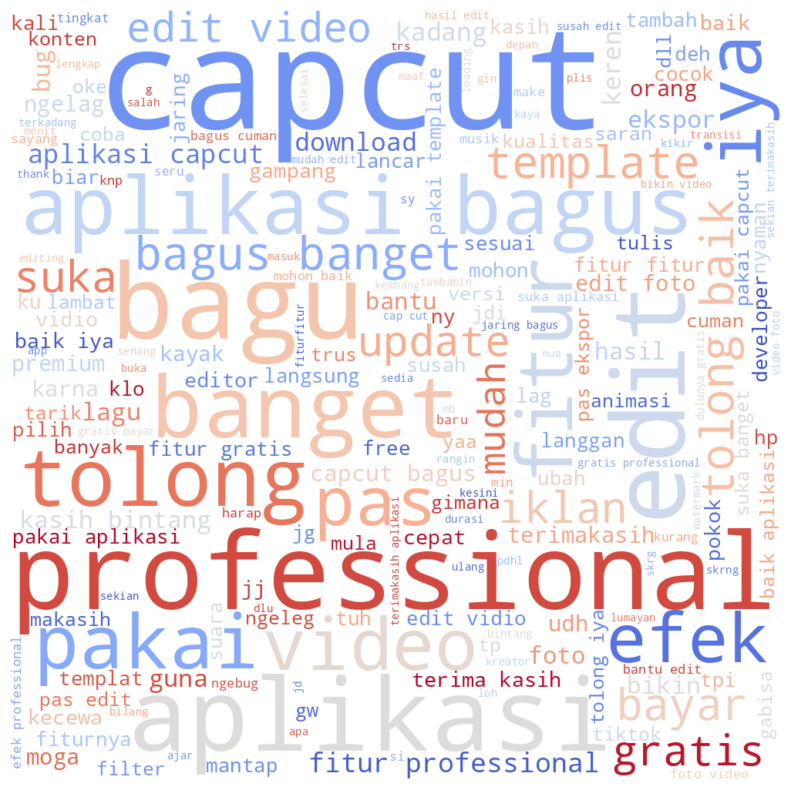

In [42]:
positive_label = ' '.join(word for word in df_copy[df_copy['polarity'] == 'positive']['final_text'])
wordcloud_positive = WordCloud(colormap='coolwarm', width=1000, height=1000, mode='RGBA', background_color='white').generate(positive_label)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### 2. Label 'Negative'

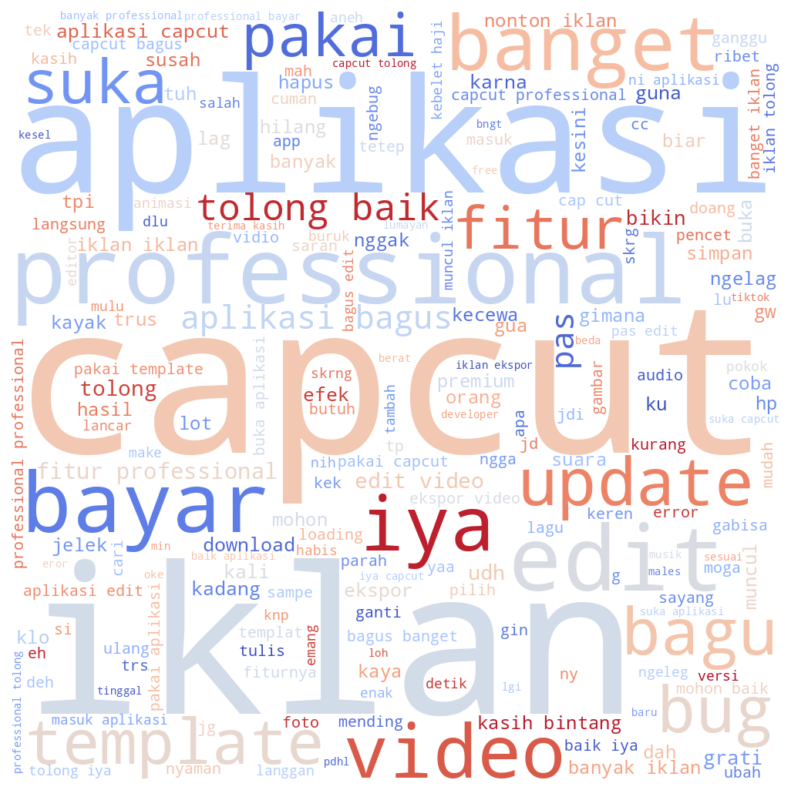

In [51]:
positive_label = ' '.join(word for word in df_copy[df_copy['polarity'] == 'negative']['final_text'])
wordcloud_positive = WordCloud(colormap='coolwarm', width=1000, height=1000, mode='RGBA', background_color='white').generate(positive_label)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Skema 1
### SVC  |  TF-IDF  | 80/20

In [71]:
X_svc = df_copy['final_text']
y_svc = df_copy['polarity']
tfidf_svc = TfidfVectorizer(max_features=1000, min_df=8, max_df=0.8)
X_tfidf_svc = tfidf_svc.fit_transform(X_svc)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_tfidf_svc, y_svc, test_size=0.2, random_state=42)

In [72]:
svc = SVC()
svc.fit(X_train_svc.toarray(), y_train_svc)
y_pred_train_svc = svc.predict(X_train_svc.toarray())
y_pred_test_svc = svc.predict(X_test_svc.toarray())
accuracy_train_svc = accuracy_score(y_pred_train_svc, y_train_svc)
accuracy_test_svc = accuracy_score(y_pred_test_svc, y_test_svc)
print('Accuracy_train:', accuracy_train_svc, 'Accuracy_test:', accuracy_test_svc)

Accuracy_train: 0.9875 Accuracy_test: 0.897


# Skema 2
### LSTM  |  TF-IDF  |  80/20

In [73]:
class myCallback(keras.callbacks.Callback) :
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.988 and logs.get('val_accuracy') >= 0.905) :
            print('\nAkurasi telah mencapai >90%')
            self.model.stop_training = True
callbacks = myCallback()
X_lstm = df_copy['final_text']
y_lstm = df_copy['polarity']
tfidf_lstm = TfidfVectorizer(max_features=1000, min_df=15, max_df=0.8)
X_tfidf_lstm = tfidf_lstm.fit_transform(X_lstm)
le = LabelEncoder()
y_lstm = le.fit_transform(y_lstm)
features_df_lstm = pd.DataFrame(X_tfidf_lstm.toarray(), columns=tfidf_lstm.get_feature_names_out())
features_df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1000 entries, abis to zoom
dtypes: float64(1000)
memory usage: 76.3 MB


In [74]:
tokenizer_lstm = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer_lstm.fit_on_texts(df_copy['final_text'])
X_seq_lstm = tokenizer_lstm.texts_to_sequences(df_copy['final_text'])
X_pad_lstm = pad_sequences(X_seq_lstm, maxlen=100)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad_lstm, y_lstm, test_size=0.2, random_state=42)

In [75]:
model_lstm = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=64, validation_split=0.1, callbacks=[callbacks])

ypred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")
print(classification_report(y_test_lstm, ypred_lstm))

loss_lstm, acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, batch_size=8)
print(f"Akurasi: {acc_lstm:.3f}")

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.7384 - loss: 0.6019 - val_accuracy: 0.8300 - val_loss: 0.4367
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.8596 - loss: 0.3400 - val_accuracy: 0.8863 - val_loss: 0.2901
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9121 - loss: 0.2177 - val_accuracy: 0.9062 - val_loss: 0.2626
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 146ms/step - accuracy: 0.9360 - loss: 0.1732 - val_accuracy: 0.9162 - val_loss: 0.2430
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.9454 - loss: 0.1443 - val_accuracy: 0.9250 - val_loss: 0.2419
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9557 - loss: 0.1245 - val_accuracy: 0.9212 - val_loss: 0.2432
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.9597 - loss: 0.1162 - val_accuracy: 0.9187 - val_loss: 0.2505
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - accuracy: 0.9685 - loss: 0

# Skema 3
### LSTM  |  TF-IDF  |  70/30

In [76]:
X_train_lstm_2, X_test_lstm_2, y_train_lstm_2, y_test_lstm_2 = train_test_split(X_pad_lstm, y_lstm, test_size=0.3, random_state=42)

In [77]:
model_lstm_2 = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=100),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_2.fit(X_train_lstm_2, y_train_lstm_2, epochs=30, batch_size=64, validation_split=0.1, callbacks=[callbacks])

ypred_lstm_2 = (model_lstm_2.predict(X_test_lstm_2) > 0.5).astype("int32")
print(classification_report(y_test_lstm_2, ypred_lstm_2))

loss_lstm_2, acc_lstm_2 = model_lstm_2.evaluate(X_test_lstm_2, y_test_lstm_2, batch_size=8)
print(f"Akurasi: {acc_lstm_2:.3f}")

Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 28s 162ms/step - accuracy: 0.7484 - loss: 0.5950 - val_accuracy: 0.8443 - val_loss: 0.4257
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.8507 - loss: 0.3410 - val_accuracy: 0.8686 - val_loss: 0.2960
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9225 - loss: 0.2035 - val_accuracy: 0.8700 - val_loss: 0.3005
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.9244 - loss: 0.1861 - val_accuracy: 0.9014 - val_loss: 0.2830
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9465 - loss: 0.1381 - val_accuracy: 0.9086 - val_loss: 0.2626
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9574 - loss: 0.1261 - val_accuracy: 0.9029 - val_loss: 0.3080
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9666 - loss: 0.0990 - val_accuracy: 0.9100 - val_loss: 0.3288
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.9635 - loss: 0.1003 - val_accu